In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_prueba = pd.read_csv('/work/Prueba_Colsubsidio.csv',delimiter=',',index_col=0)

In [ ]:
df_prueba.head()

,FechaExpedicion,Cancelacion,Gestionable,Retencion,TIPO,ANO_MES,Target,FechaProceso,DisponibleAvances,LimiteAvances,...,edad,nivel_educativo,estado_civil,Genero,PAC,contrato,estrato,cuota_monetaria,sub_vivenda,bono_lonchera
id,,,,,,,,,,,,,,,,,,,,,
1,2006-11-04,NaN,NaN,NaN,NaN,NaN,0.0,2018-04-01,1050000.0,1050000,...,31,tecnic_tecnologico,soltero,F,1,4,NaN,276266,190999,84655
2,2007-08-17,NaN,NaN,NaN,NaN,NaN,0.0,2018-04-01,1180000.0,1180000,...,38,tecnico_tecnologico,soltero,M,1,1,NaN,204600,129945,296035
3,2008-05-08,NaN,NaN,NaN,NaN,NaN,0.0,2018-04-01,150000.0,150000,...,42,primaria,soltero,M,3,3,NaN,44973,64180,258891
4,2006-12-21,NaN,NaN,NaN,NaN,NaN,0.0,2018-04-01,680000.0,680000,...,60,tecnico_tecnologico,soltero,M,1,4,NaN,162691,61783,150028
5,2007-09-13,NaN,NaN,NaN,NaN,NaN,0.0,2018-04-01,3307500.0,3307500,...,27,tecnico_tecnologico,separado,M,1,1,NaN,57423,128739,177292


In [ ]:
## Asignacion Periodo (YYYY-MM)
df_prueba = df_prueba.assign(Periodo = df_prueba['FechaExpedicion'].str[:7])

## Periodo con menor y mayor pago

Periodo_pago = df_prueba.groupby(['Periodo'])['PagodelMes'].sum().reset_index(name = 'Cantidad Pagos al mes')
Periodo_pago.sort_values('Cantidad Pagos al mes', inplace=True)
Muestra_menores = Periodo_pago[:5].copy()
Muestra_mayores = Periodo_pago[-5:].copy()
Muestra_mayores


,Periodo,Cantidad Pagos al mes
121,2016-11,15665365.74
85,2013-11,16172738.39
134,2017-12,16648400.63
117,2016-07,18649657.18
132,2017-10,20235857.23


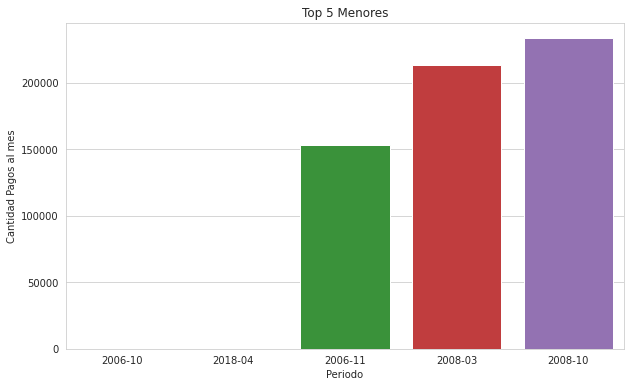

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
fig= sns.barplot(
    data=Muestra_menores,
    y='Cantidad Pagos al mes',
    x='Periodo'
)
fig.set_title('Top 5 Menores')
plt.show()

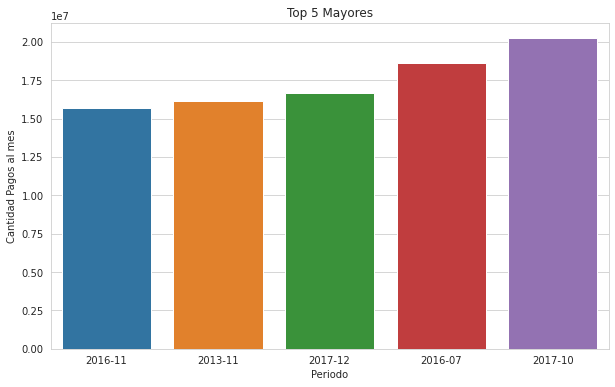

In [ ]:
## Periodo con mayor pago

plt.figure(figsize=(10,6))
fig = sns.barplot(
    data=Muestra_mayores,
    y='Cantidad Pagos al mes',
    x='Periodo'
)
fig.set_title('Top 5 Mayores')
plt.show()


In [ ]:
## Categoria con mayor participacion en recaudo de pago 

Media_Recaudo_pago = df_prueba.groupby(['categoria'])['PagodelMes'].mean().reset_index(name = 'Promedio * Categoria')
Sum_Recaudo_pago = df_prueba.groupby(['categoria'])['PagodelMes'].sum().reset_index(name = 'Totales * Categoria')

M_S_Recaudo = pd.merge(Media_Recaudo_pago,Sum_Recaudo_pago, on= 'categoria')
S_Recaudo = M_S_Recaudo.sort_values('Totales * Categoria')
M_Recaudo = M_S_Recaudo.sort_values('Promedio * Categoria')
M_Recaudo


,categoria,Promedio * Categoria,Totales * Categoria
0,A,5797.648433,1.753093e+08
1,B,17352.506294,3.304438e+08
2,C,35694.998156,2.042111e+08


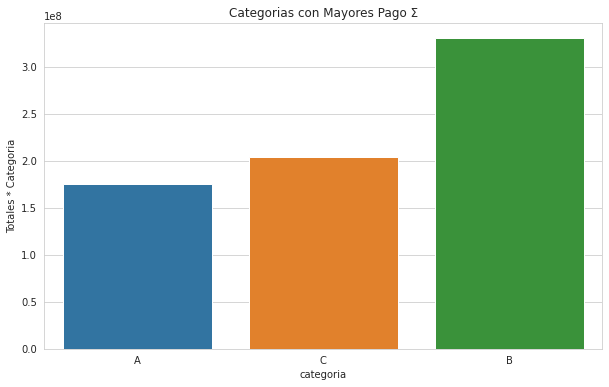

In [ ]:
## Contegoria con mayor Pago

plt.figure(figsize=(10,6))
fig = sns.barplot(
    data=S_Recaudo,
    y='Totales * Categoria',
    x='categoria'
)
fig.set_title('Categorias con Mayores Pago Σ')
plt.show()


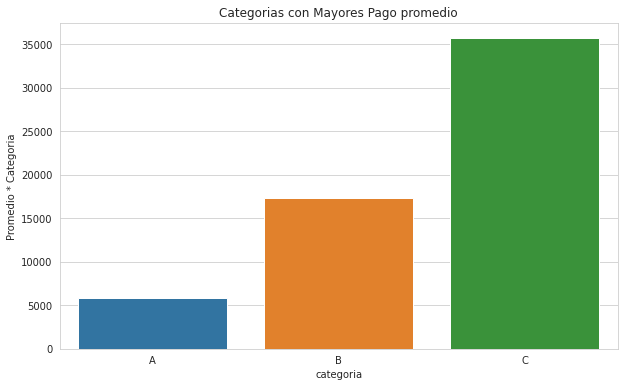

In [ ]:
## Contegoria con mayor Pago

plt.figure(figsize=(10,6))
fig = sns.barplot(
    data=M_Recaudo,
    y='Promedio * Categoria',
    x='categoria'
)
fig.set_title('Categorias con Mayores Pago promedio')

plt.show()

In [ ]:
#Saldo Promedio, Por cada SEGMENTO

Saldo_segmento = df_prueba.groupby(['segmento'])['Saldo'].mean().reset_index(name = 'Saldo Promedio')

Saldo_segmento = Saldo_segmento.sort_values('Saldo Promedio')
Saldo_segmento

,segmento,Saldo Promedio
0,Segemnto_Basico,226885.300416
2,Segmento_Joven,316071.396099
3,Segmento_Medio,432391.296385
1,Segmento_Alto,976178.017719


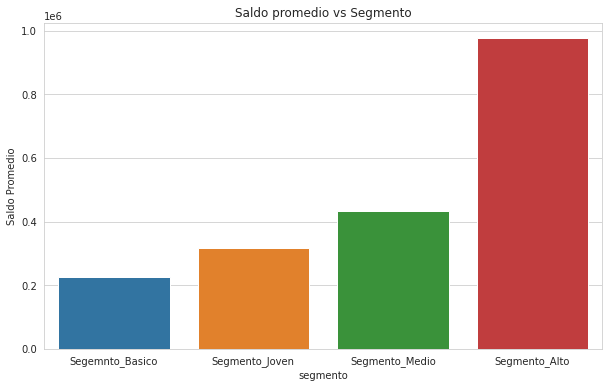

In [ ]:
#Saldo Promedio, Por cada SEGMENTO

plt.figure(figsize=(10,6))
fig = sns.barplot(
    data=Saldo_segmento,
    y='Saldo Promedio',
    x='segmento'
)
fig.set_title('Saldo promedio vs Segmento')

plt.show()


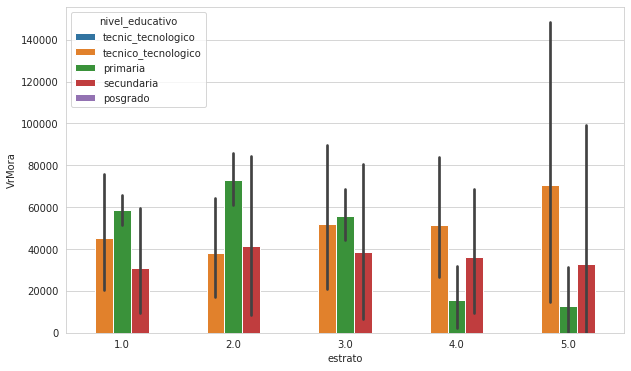

In [ ]:
# Valor Mora vs Estrato vs Nivel Educativo 

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_prueba,
    x='estrato',
    y='VrMora',    
    hue='nivel_educativo'
)
plt.show()

<Figure size 720x432 with 0 Axes>

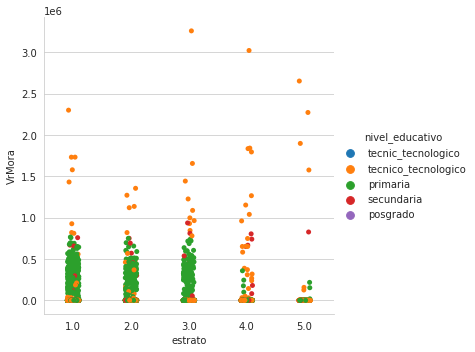

In [ ]:
# Valor Mora vs Estrato vs Nivel Educativo 

plt.figure(figsize=(10,6))
sns.catplot(
    data=df_prueba,
    x='estrato',
    y='VrMora',    
    hue='nivel_educativo'
);
plt.show()

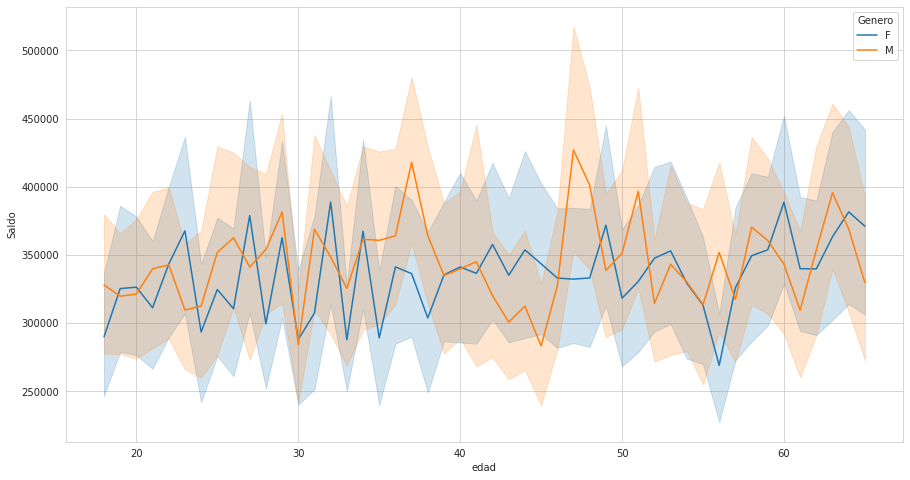

In [ ]:
# Valor Saldo vs Edad 

plt.figure(figsize=(15,8))
sns.lineplot(
    data=df_prueba,
    x='edad',
    y='Saldo',
    hue='Genero'
)
plt.show()

2 Reporte de linea de Subsidio Genero

In [ ]:
#2 Reporte de linea de Subsidio Genero

## Agrupacion por Genero
Cuota_Monetaria_Genero = df_prueba.groupby(['Genero'])['cuota_monetaria'].sum().reset_index(name = 'Total Cuota Monetaria')
Sub_vivienda_Genero = df_prueba.groupby(['Genero'])['sub_vivenda'].sum().reset_index(name = 'Total Subsidio Vivienda')
Bono_lonchera_Genero = df_prueba.groupby(['Genero'])['bono_lonchera'].sum().reset_index(name = 'Total Bono Lonchera')

## Join de datos
union1 = pd.merge(Cuota_Monetaria_Genero,Sub_vivienda_Genero, on='Genero')
Segundo_Genero = pd.merge(union1,Bono_lonchera_Genero, on='Genero')

## Creacion de Columna %
Segundo_Genero = Segundo_Genero.assign(Por_CuotaMonetaria = lambda x: Segundo_Genero['Total Cuota Monetaria']/10000000000)
Segundo_Genero = Segundo_Genero.assign(Por_SubVivienda = lambda x: Segundo_Genero['Total Subsidio Vivienda']/5000000000)
Segundo_Genero = Segundo_Genero.assign(Por_BonoLonchera = lambda x: Segundo_Genero['Total Bono Lonchera']/11000000000)


Segundo_Genero


,Genero,Total Cuota Monetaria,Total Subsidio Vivienda,Total Bono Lonchera,Por_CuotaMonetaria,Por_SubVivienda,Por_BonoLonchera
0,F,4576079125,4564629393,4565311934,0.457608,0.912926,0.415028
1,M,4645177472,4605236359,4620509797,0.464518,0.921047,0.420046


In [ ]:
## Agrupacion por Categoria
Cuota_Monetaria_Genero = df_prueba.groupby(['categoria'])['cuota_monetaria'].sum().reset_index(name = 'Total Cuota Monetaria')
Sub_vivienda_Genero = df_prueba.groupby(['categoria'])['sub_vivenda'].sum().reset_index(name = 'Total Subsidio Vivienda')
Bono_lonchera_Genero = df_prueba.groupby(['categoria'])['bono_lonchera'].sum().reset_index(name = 'Total Bono Lonchera')

## Join de datos
union1 = pd.merge(Cuota_Monetaria_Genero,Sub_vivienda_Genero, on='categoria')
unionTotal = pd.merge(union1,Bono_lonchera_Genero, on='categoria')

## Creacion de Columna %
unionTotal = unionTotal.assign(Por_CuotaMonetaria = lambda x: unionTotal['Total Cuota Monetaria']/10000000000)
unionTotal = unionTotal.assign(Por_SubVivienda = lambda x: unionTotal['Total Subsidio Vivienda']/5000000000)
unionTotal = unionTotal.assign(Por_BonoLonchera = lambda x: unionTotal['Total Bono Lonchera']/11000000000)


unionTotal


,categoria,Total Cuota Monetaria,Total Subsidio Vivienda,Total Bono Lonchera,Por_CuotaMonetaria,Por_SubVivienda,Por_BonoLonchera
0,A,5076023084,5035619958,5054816579,0.507602,1.007124,0.459529
1,B,3187279916,3176199898,3174004682,0.318728,0.635240,0.288546
2,C,957953597,958045896,957000470,0.095795,0.191609,0.087000


In [ ]:
## Agrupacion por Segmento
Cuota_Monetaria_Genero = df_prueba.groupby(['segmento'])['cuota_monetaria'].sum().reset_index(name = 'Total Cuota Monetaria')
Sub_vivienda_Genero = df_prueba.groupby(['segmento'])['sub_vivenda'].sum().reset_index(name = 'Total Subsidio Vivienda')
Bono_lonchera_Genero = df_prueba.groupby(['segmento'])['bono_lonchera'].sum().reset_index(name = 'Total Bono Lonchera')

## Join de datos
union1 = pd.merge(Cuota_Monetaria_Genero,Sub_vivienda_Genero, on='segmento')
unionTotal = pd.merge(union1,Bono_lonchera_Genero, on='segmento')

## Creacion de Columna %
unionTotal = unionTotal.assign(Por_CuotaMonetaria = lambda x: unionTotal['Total Cuota Monetaria']/10000000000)
unionTotal = unionTotal.assign(Por_SubVivienda = lambda x: unionTotal['Total Subsidio Vivienda']/5000000000)
unionTotal = unionTotal.assign(Por_BonoLonchera = lambda x: unionTotal['Total Bono Lonchera']/11000000000)


unionTotal


,segmento,Total Cuota Monetaria,Total Subsidio Vivienda,Total Bono Lonchera,Por_CuotaMonetaria,Por_SubVivienda,Por_BonoLonchera
0,Segemnto_Basico,4315283660,4291912414,4286876966,0.431528,0.858382,0.389716
1,Segmento_Alto,189454102,189743001,189276112,0.018945,0.037949,0.017207
2,Segmento_Joven,602584954,589601063,603959666,0.060258,0.117920,0.054905
3,Segmento_Medio,4113933881,4098609274,4105708987,0.411393,0.819722,0.373246


In [ ]:
## Agrupacion por Nivel Educativo
Cuota_Monetaria_Genero = df_prueba.groupby(['nivel_educativo'])['cuota_monetaria'].sum().reset_index(name = 'Total Cuota Monetaria')
Sub_vivienda_Genero = df_prueba.groupby(['nivel_educativo'])['sub_vivenda'].sum().reset_index(name = 'Total Subsidio Vivienda')
Bono_lonchera_Genero = df_prueba.groupby(['nivel_educativo'])['bono_lonchera'].sum().reset_index(name = 'Total Bono Lonchera')

## Join de datos
union1 = pd.merge(Cuota_Monetaria_Genero,Sub_vivienda_Genero, on='nivel_educativo')
unionTotal = pd.merge(union1,Bono_lonchera_Genero, on='nivel_educativo')

## Creacion de Columna %
unionTotal = unionTotal.assign(Por_CuotaMonetaria = lambda x: unionTotal['Total Cuota Monetaria']/10000000000)
unionTotal = unionTotal.assign(Por_SubVivienda = lambda x: unionTotal['Total Subsidio Vivienda']/5000000000)
unionTotal = unionTotal.assign(Por_BonoLonchera = lambda x: unionTotal['Total Bono Lonchera']/11000000000)


unionTotal

,nivel_educativo,Total Cuota Monetaria,Total Subsidio Vivienda,Total Bono Lonchera,Por_CuotaMonetaria,Por_SubVivienda,Por_BonoLonchera
0,posgrado,2381026,2139840,1908094,0.000238,0.000428,0.000173
1,primaria,4867776261,4829358830,4853827849,0.486778,0.965872,0.441257
2,secundaria,960239074,962618839,953348351,0.096024,0.192524,0.086668
3,tecnic_tecnologico,276266,190999,84655,0.000028,0.000038,0.000008
4,tecnico_tecnologico,3390583970,3375557244,3376652782,0.339058,0.675111,0.306968


In [ ]:
## Agrupacion Gestionable
Cuota_Monetaria_Genero = df_prueba.groupby(['Gestionable'])['cuota_monetaria'].sum().reset_index(name = 'Total Cuota Monetaria')
Sub_vivienda_Genero = df_prueba.groupby(['Gestionable'])['sub_vivenda'].sum().reset_index(name = 'Total Subsidio Vivienda')
Bono_lonchera_Genero = df_prueba.groupby(['Gestionable'])['bono_lonchera'].sum().reset_index(name = 'Total Bono Lonchera')

## Join de datos
union1 = pd.merge(Cuota_Monetaria_Genero,Sub_vivienda_Genero, on='Gestionable')
unionTotal = pd.merge(union1,Bono_lonchera_Genero, on='Gestionable')

## Creacion de Columna %
unionTotal = unionTotal.assign(Por_CuotaMonetaria = lambda x: unionTotal['Total Cuota Monetaria']/10000000000)
unionTotal = unionTotal.assign(Por_SubVivienda = lambda x: unionTotal['Total Subsidio Vivienda']/5000000000)
unionTotal = unionTotal.assign(Por_BonoLonchera = lambda x: unionTotal['Total Bono Lonchera']/11000000000)


unionTotal

,Gestionable,Total Cuota Monetaria,Total Subsidio Vivienda,Total Bono Lonchera,Por_CuotaMonetaria,Por_SubVivienda,Por_BonoLonchera
0,GESTIONABLE,774168,715628,841003,0.000077,0.000143,0.000076
1,Gestionable,133963639,135304959,135311297,0.013396,0.027061,0.012301
2,NO GESTIONABLE,319994,241911,319743,0.000032,0.000048,0.000029
3,No Gestionable,46207933,48640472,49500198,0.004621,0.009728,0.004500
4,No gestionable,73851406,73886151,69497585,0.007385,0.014777,0.006318


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff2c00f2-e65d-4b06-9e2c-17e6644f2756' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>